Gerekli kütüphaneleri ekledim ve train data'sını ekledim.

---



In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#urlCSV='/content/train.csv'
#urlDrive='/content/train.csv' + urlCSV.split('/')[-2]
df=pd.read_csv('/content/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data'mızın büyüklüğünü df.size ile bulabiliyoruz.

In [ ]:
#Soru 1
# Data'nın büyüklüğü
print("Data'nın büyüklüğü:" ,df.size)

Data'nın büyüklüğü: 10692


İstenildiği üzere ilk 5 satırı bastırdım.

In [ ]:
#Soru 2
# İlk 5 satır
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data'da yer alan veri türlerini öğrenmek için dtypes kullandım.

In [ ]:
#Soru 3
# Data'nın sütunlarında hangi veri türleri var
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Sütunlardaki eksik veri sayılarını hesaplamak için isnull ile eksik olup olmadığını öğrendim, sonra sum ile topladım.

In [ ]:
#Soru 4
# Sütunlardaki eksik veri sayıları
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Data'nın count, mean, std. dev, quartile gibi özelliklerini bastırmak için describe kullanmamız yetiyor.

In [ ]:
#Soru 5
# Data'nın count, mean, std. dev, quartile gibi özellikleri
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Inconsistent data entry olup olmadığını anlamak için, kolaylıkla görebileceğimiz name sütununa baktım. 
Sıralama yaptıktan sonra sonlara doğru küçük-büyük harf farklılığı, yanlış yazım gibi sebeplerden dolayı inconsistent data entry olduğunu gördüm. Aynı name değerleri farklı kişiler gibi gösterildiği için inconsistent data entry olduğunu anladım. Örnek: Yousseff, Mr. Gerious ile Youseff, Mr. Gerious

In [ ]:
#Soru 6
#Name sütununu inceleyerek başladım. Sütundaki benzersiz değerleri aldım.
names=df['Name'].unique()
#Sütunu sıraladım. Inconsistent data entry olduğu görülüyor.
names.sort()
names

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
       'Ali, Mr. Ahmed', 'Ali, Mr. William',
       'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
       'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Allum, Mr. Owen George',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
       'Andersson, Miss. Ebba Iris Alfrida',
       'Andersson, Miss. Ellis Anna Maria',
       'Andersson, Miss. Erna Alexandra',
       'Andersson, Miss. Ingeborg Con

Aşağıda bazı kategorik ve sayısal veriler arasındaki ilişkileri görselleştirdim:
İlk görselde, ölenlerin sayısının neredeyse hayatta kalanların 2 katına yakın olduğu görülüyor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


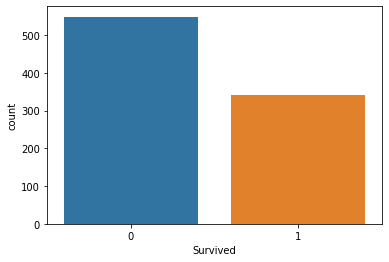

In [ ]:
#Soru 7
# Önce hayatta kalan kişiler ile ölen kişilerin grafiğini çıkardım.
sns.countplot(df['Survived'])

Kadınların hayatta kalma oranı erkeklerden çok daha fazla görünüyor. Erkeklerin çoğu ölmüşken kadınların çoğu hayatta kalmış.

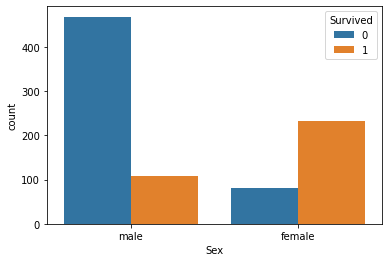

In [ ]:
# Hayatta kalma durumu ile cinsiyeti karşılaştırdım
sns.countplot(data=df, x='Sex', hue='Survived')

 1 . sınıf bilete sahip olanlar, diğerlerine göre daha yüksek oranda hayatta kalmışken, 3. sınıf bilete sahip olanların büyük oranı ölmüş. 2. sınıf bileti olanlar neredeyse yarı yarıya hayatta kalmış.  

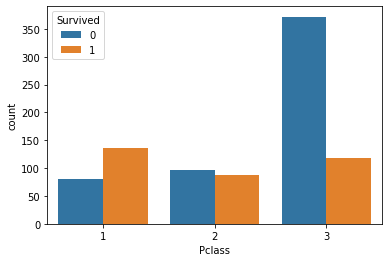

In [ ]:
# Bilet sınıfı ile hayatta kalmayı kıyasladım ve bilet sınıfı yüksek olanların daha çok hayatta kaldığını gördüm.
sns.countplot(data=df, x='Pclass', hue='Survived')

Gemideki yolcuların yaş grafiğini çıkardım ve çoğunluk 18 ile 40 arası görünüyor.

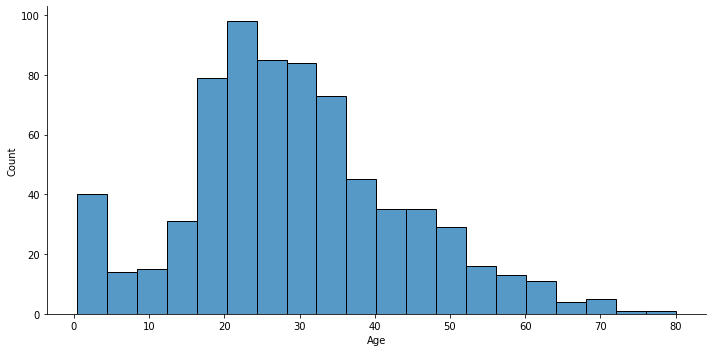

In [ ]:
#Yolcuların çoğunluğu 18-40 yaş aralığında gibi görünüyor.
sns.displot(data=df, x='Age', aspect=2.0)

Gemideki cinsiyet gradiğini çizdirdim ve erkek yoğunluğunun daha fazla olduğunu gördüm.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


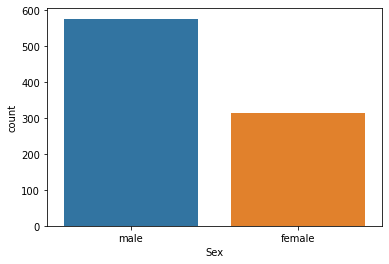

In [ ]:
#Gemideki erkek oranı kadın oranının neredeyse 2 katı gibi görünüyor.
sns.countplot(df['Sex'])

Bilet sınıflarına göre yolcuların grafiğini çizdirdim. En çok 3. sınıf bilet alan varken sonrasında 1. sınıf ve en son sırada 1. sınıfa yakın bir sayıda 2. sınıf bilet alan var.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


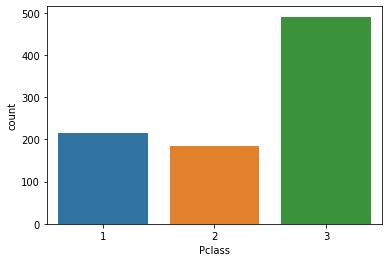

In [ ]:
#Bilet sınıflarını ve sayılarını çizdirdim
sns.countplot(df['Pclass'])

Soru 4'te gördüğümüz üzere data'mızda Age, Embarked ve Cabin sütunlarında eksik veriler vardı. Bunları fillna ile doldurdum. 

In [ ]:
#Soru 8 
# Age sütununda boş değerleri ortalama değer ile doldurdum.
df['Age'].fillna(df['Age'].mean(),inplace = True)
# Embarked sütununda boşlukları 'S' ile doldurdum.
df['Embarked'].fillna('S',inplace =True)
# Cabin sütununda boşlukları '0' ile doldurdum.
df['Cabin'].fillna('0',inplace =True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,0,Q


Colab'da olmadığı için indirdim

In [ ]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pip --upgrade --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 6.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


fuzzywuzzy'i kullanabilmek için dışarıdan indirmem gerekti, import ile gelmedi

In [ ]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Name değerlerini küçük harfe çevirip aralarındaki boşlukları sildim ki karşılaştırma yaparken bu durumlara takılmasın.

In [ ]:
#Soru 9
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
# inconsistent data entry'ler bir sorun olmasın diye önce Name bilgilerini küçük harfe çevirdim.
df['Name'] = df['Name'].str.lower()
# Sonra aralarda boşluk varsa sildim.
df['Name'] = df['Name'].str.strip()
# Farklı name değerlerini yazdırdım
names=df['Name'].unique()
# Bu değerleri sıraladım
names.sort()
names

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


array(['abbing, mr. anthony', 'abbott, mr. rossmore edward',
       'abbott, mrs. stanton (rosa hunt)', 'abelson, mr. samuel',
       'abelson, mrs. samuel (hannah wizosky)',
       'adahl, mr. mauritz nils martin', 'adams, mr. john',
       'ahlin, mrs. johan (johanna persdotter larsson)',
       'aks, mrs. sam (leah rosen)', 'albimona, mr. nassef cassem',
       'alexander, mr. william', 'alhomaki, mr. ilmari rudolf',
       'ali, mr. ahmed', 'ali, mr. william',
       'allen, miss. elisabeth walton', 'allen, mr. william henry',
       'allison, master. hudson trevor', 'allison, miss. helen loraine',
       'allison, mrs. hudson j c (bessie waldo daniels)',
       'allum, mr. owen george',
       'andersen-jensen, miss. carla christine nielsine',
       'anderson, mr. harry', 'andersson, master. sigvard harald elias',
       'andersson, miss. ebba iris alfrida',
       'andersson, miss. ellis anna maria',
       'andersson, miss. erna alexandra',
       'andersson, miss. ingeborg con

İleride yazacağım aynı verileri birleştirme fonksiyonunda benzerlik oranını parametre vereceğim için name kolonundan bir hatalı örnek ile kendisine benzeyen diğer verilerin benzerlik oranlarını aldım. Burada en yüksek benzerlik oranı 97 çıktı. Ben de fonksiyonumda en az 96 benzerlik oranına sahip verileri birleştirme işlemi yaptım.

In [ ]:
# Burada verdiğim girdi ile benzerliği bulunan name'leri ve benzerlik oranlarını belirledim.
# Çıktıda, yanlış yazılan isim ile benzerlik oranı 97 çıktı.
matches = fuzzywuzzy.process.extract("yousseff, mr. gerious",names, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('yousseff, mr. gerious', 100),
 ('youseff, mr. gerious', 97),
 ('moubarek, master. gerios', 63),
 ('ibrahim shawah, mr. yousseff', 62),
 ('betros, mr. tannous', 61),
 ('elias, mr. tannous', 57),
 ('samaan, mr. youssef', 56),
 ('nenkoff, mr. christo', 54),
 ('staneff, mr. ivan', 53),
 ('taussig, mr. emil', 53)]

Bu fonksiyonda önce verileri farklı veriler olarak gurupladım ve oluşan gurupta birbirine benzer verilerin benzerlik oranlarını kıyasladım. Benzerlik oranı 96 ve üstü olanları aynı veri oldukları için birleştirdim.

In [ ]:
# Yukarıda benzerlik oranı 97 çıktığı için bu fonksiyonda minimum 96 belirledim.
# Bu fonksiyon, aynı değerleri birleştirecek.
def replace_matches_in_column(df, column, string_to_match, min_ratio = 96):
    # Kolondaki farklı değerleri aldım.
    strings = df[column].unique()
    
  #  string_to_match girdisine en çok benzeyen 10 değeri aldım.
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

  #  Benzerlik oranı min_ratio'ya eşit veya üstünde olanları aldım.
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    
    rows_with_matches = df[column].isin(close_matches)

    # Yüksek oranda benzeyen değerleri tek değer yaptım.
    df.loc[rows_with_matches, column] = string_to_match
    
    # Tamamlandı!
    print("All done!")
    
# Fonksiyonu kullanıp name kolonunu düzenledim.
replace_matches_in_column(df=df, column='Name', string_to_match="yousseff, mr. gerious")
names = df['Name'].unique()
names.sort()
names

All done!


array(['abbing, mr. anthony', 'abbott, mr. rossmore edward',
       'abbott, mrs. stanton (rosa hunt)', 'abelson, mr. samuel',
       'abelson, mrs. samuel (hannah wizosky)',
       'adahl, mr. mauritz nils martin', 'adams, mr. john',
       'ahlin, mrs. johan (johanna persdotter larsson)',
       'aks, mrs. sam (leah rosen)', 'albimona, mr. nassef cassem',
       'alexander, mr. william', 'alhomaki, mr. ilmari rudolf',
       'ali, mr. ahmed', 'ali, mr. william',
       'allen, miss. elisabeth walton', 'allen, mr. william henry',
       'allison, master. hudson trevor', 'allison, miss. helen loraine',
       'allison, mrs. hudson j c (bessie waldo daniels)',
       'allum, mr. owen george',
       'andersen-jensen, miss. carla christine nielsine',
       'anderson, mr. harry', 'andersson, master. sigvard harald elias',
       'andersson, miss. ebba iris alfrida',
       'andersson, miss. ellis anna maria',
       'andersson, miss. erna alexandra',
       'andersson, miss. ingeborg con

LabelEncoder ile kategorik değişkenlerime nümerik değişkenler atadım. Fit transform ile de kategorik değişkenlerin bulunduğu kolonlara label encoder’ı uyguladım.

In [ ]:
#Soru 10
from sklearn.preprocessing import LabelEncoder
# LabelEncoder ile kategorik verileri sayısal verilere dönüştürdüm. Sonra bunu Sex ve Embarked kolonlarına uyguladım.
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] =le.fit_transform(df['Embarked'])
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"montvila, rev. juozas",1,27.000000,0,0,211536,13.00,0,2
887,888,1,1,"graham, miss. margaret edith",0,19.000000,0,0,112053,30.00,B42,2
888,889,0,3,"johnston, miss. catherine helen ""carrie""",0,29.699118,1,2,W./C. 6607,23.45,0,2
889,890,1,1,"behr, mr. karl howell",1,26.000000,0,0,111369,30.00,C148,0
890,891,0,3,"dooley, mr. patrick",1,32.000000,0,0,370376,7.75,0,1


*   family: bu değişkeni, her kişinin toplam kaç kişi ile birlikte bindiğini görmek için oluşturdum. Daha sonra hayatta kalma ile oranlayabilirim.
*   price_per_person: Fare toplam yolcu ücreti olduğu için kişi başı bilet fiyatını bulmak için bunu oluşturdum. Bilet sınıfını tahmin etmede kullanabilirim.
*   Title: kişilerin unvanlarını karşılaştırabilmek için oluşturdum. Hayatta kalma ile bağlantısı olabilir.



In [ ]:
#Soru 11
# Gemiye beraberinde binilen toplam kişi sayısını bulmak için SibSp ve Parch değerlerini topladım. 
df['family'] = df['SibSp'] +df['Parch']
# Kişi başına düşen bilet fiyatını hesaplamak için yolcu ücretini toplam kişi sayısına bölmem gerekti. 
# Bunu da aile üyesi sayısı + 1 kişinin kendisi olarak hesaplayıp bölerek buldum.
df['price_per_person'] = df['Fare']/(df['family']+1)
# Sonra bu değeri integer'a dönüştürdüm
df['price_per_person'] = df['price_per_person'].astype(int)
# Kişinin ünvanı ile hayatta kalma değeri arasında bir bağlantı var mı diye ünvanlarını ayrıştırdım. 
# str.extract ile verdiğim karaktere gelene kadar olan kısmı alacak.
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,price_per_person,Title
0,1,0,3,"braund, mr. owen harris",1,22.0,1,0,A/5 21171,7.2500,0,2,1,3,mr
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,35,mrs
2,3,1,3,"heikkinen, miss. laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2,0,7,miss
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",0,35.0,1,0,113803,53.1000,C123,2,1,26,mrs
4,5,0,3,"allen, mr. william henry",1,35.0,0,0,373450,8.0500,0,2,0,8,mr


Title değerlerini kategorik halden nümeriğe çevirdim.
price_per_person değerlerini daha sonra pclass ile kıyaslayabilmek için sınıflara ayırdım. Verdiğim değer aralıklarına göre sınıflandırdım.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder ile kategorik verileri sayısal verilere dönüştürdüm. Sonra bunu Title kolonuna uyguladım.
le = LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])
# price_per_person değerlerini pclass ile karşılaştırabilmek için verdiğim aralıklar ile sınıflara ayırdım.
# 15'ten küçük eşit ise 3. sınıf olacak
df.loc[df['price_per_person'] <= 15, 'price_per_person'] = 3
# 15-30 aralığında ise 2. sınıf dedim.
df.loc[(df['price_per_person'] > 15) & (df['price_per_person'] <= 30), 'price_per_person'] = 2
# 30'dan büyük ise 1. sınıf olacak.
df.loc[(df['price_per_person'] > 30) , 'price_per_person'] = 1
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,price_per_person,Title
0,1,0,3,"braund, mr. owen harris",1,22.000000,1,0,A/5 21171,7.2500,0,2,1,3,12
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,1,1,13
2,3,1,3,"heikkinen, miss. laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,2,0,3,9
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",0,35.000000,1,0,113803,53.1000,C123,2,1,2,13
4,5,0,3,"allen, mr. william henry",1,35.000000,0,0,373450,8.0500,0,2,0,3,12
5,6,0,3,"moran, mr. james",1,29.699118,0,0,330877,8.4583,0,1,0,3,12
6,7,0,1,"mccarthy, mr. timothy j",1,54.000000,0,0,17463,51.8625,E46,2,0,1,12
7,8,0,3,"palsson, master. gosta leonard",1,2.000000,3,1,349909,21.0750,0,2,4,3,8
8,9,1,3,"johnson, mrs. oscar w (elisabeth vilhelmina berg)",0,27.000000,0,2,347742,11.1333,0,2,2,3,13
9,10,1,2,"nasser, mrs. nicholas (adele achem)",0,14.000000,1,0,237736,30.0708,0,0,1,3,13


Verilerimin, hayatta kalma ile olan ilişkisini inceledim.

In [ ]:
#Soru 12
# değerleri integer'a çevirmek için indirdim.
from traitlets.traitlets import Integer
# mutual_info_regression için X ve y değerlerimi oluşturdum.
X = df.copy()
y = X.pop("Survived")
# kategorik değerlerime etiket atadım
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
# integer'a çevirdim
discrete_features = X.dtypes == Integer

 Bu işlemi yapacak fonksiyonu yazdım ve değer olarak verilerimi, hedef değişkeni ve ayrık değerleri yolladım.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# verilerin, hayatta kalma ile ilişkisini hesaplayan fonksiyon
def make_mi_scores(X, y, discrete_features):
    # ilişki bilgisini hesapla
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
# Verilerimi yolladım ve ilişkileri hesaplattım.
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Title               0.190302
Fare                0.134461
Ticket              0.094442
Sex                 0.090441
Age                 0.069448
Pclass              0.062917
Cabin               0.050930
Embarked            0.047440
SibSp               0.039727
family              0.026236
PassengerId         0.016572
Name                0.014570
Parch               0.000000
price_per_person    0.000000
Name: MI Scores, dtype: float64

Bu ilişkileri grafik olarak ekrana bastırdım. En çok Title ile Survived arasında ilişki buldum. Sonrasında en yakın Sex ve Fare diye ilerliyor. Sonra daha da azalıyor. Yukarıda sayısal olarak, aşağıda da grafik olarak çıktılar var.

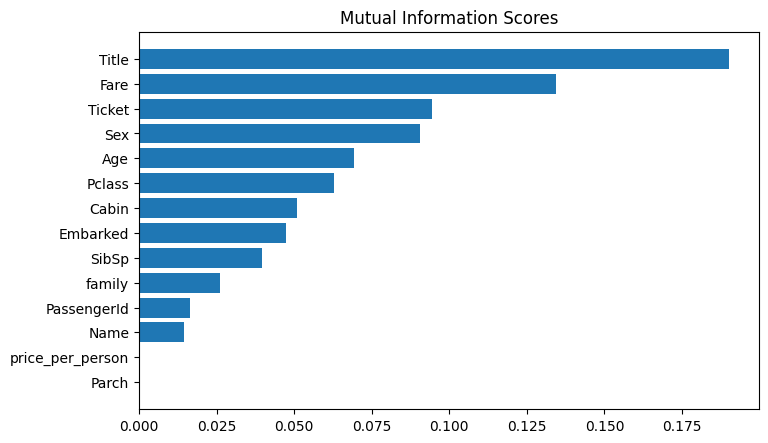

In [ ]:
# Ekrana grafik bastırma fonksiyonu
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

İyi mutual information score vermeyen ama benim tam tersini düşündüğüm verilerin grafiğini çizdirdim.

Bence genç insanların daha fazla hayatta kalması gerekiyordu ama veriler aksini gösterdi.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


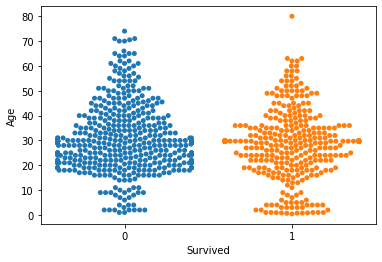

In [ ]:
# Soru 13
# Gençlerin daha fazla hayatta kalması gerektiğini düşünüyorum ama grafiğe baktığımda 20-40 yaş arasında çok fazla ölüm olduğunu gördüm.
sns.swarmplot(x=df['Survived'], y=df['Age'])

Kişi başı bilet fiyatından, 1. sınıf bilet diye gurupladığım insanların hayatta kalma oranı daha yüksek olmalıydı çünkü muhtemelen daha pahalı ve güvenli yerlerden bilet almışlardı. Ama yine yanıldım. Grafik aksini gösteriyor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


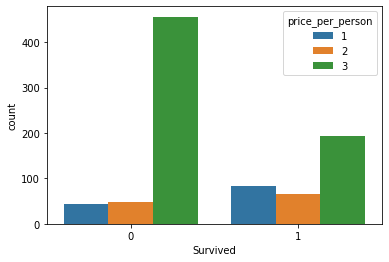

In [ ]:
# Kişi başı bilet fiyatlarına baktığımda 1. sınıf bilet alanların kurtulma ihtimalinin daha yüksek olduğunu düşünmüştüm. 
# Ama yine grafiğe baktığımda ölenlerde çok fazla 1. sınıf bilet sahibi yer alıyor.
sns.countplot(df['Survived'],hue =df['price_per_person'])

Bilet fiyatı gibi Pclass da insanların ekonomik sınıfını gösterdiği için daha güvenli yerlerde yolculuk ettiklerini düşündüm ama grafik yine aksini gösterdi.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


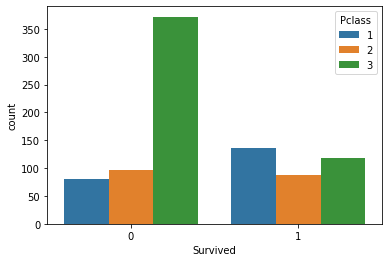

In [ ]:
# Bilet sınıfı gibi ekonomik sınıfı yüksek kişilerin hayatta kalma oranının yüksek olduğunu düşünmüştüm.
# Fakat yine grafikte ölenlerde yüksek oranla 1. sınıf kişiler yer alıyor.
sns.countplot(df['Survived'],hue =df['Pclass'])

K-means clustering ile veriler arasındaki ilişkileri grafiklere döktüm.

In [ ]:
# Soru 14
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

X = df.loc[:, ["Survived","Pclass", "Sex", "Age", "Fare","Embarked","family", "price_per_person"]]
# normalizasyon
X= (X - X.mean(axis=0)) / X.std(axis=0)
# kmeans çağırıp n_cluster 6 verdim
kmeans = KMeans(n_clusters=6)
# tahmin
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,price_per_person,Cluster
886,-0.788829,-0.369158,0.737281,-0.207592,-0.386454,0.585625,-0.56066,0.568345,0
887,1.266279,-1.565228,-1.354813,-0.822881,-0.044356,0.585625,-0.56066,-0.807729,1
888,-0.788829,0.826913,-1.354813,0.000000,-0.176164,0.585625,1.29870,0.568345,4
889,1.266279,-1.565228,0.737281,-0.284503,-0.044356,-1.941213,-0.56066,-0.807729,3
890,-0.788829,0.826913,0.737281,0.176964,-0.492101,-0.677794,-0.56066,0.568345,5


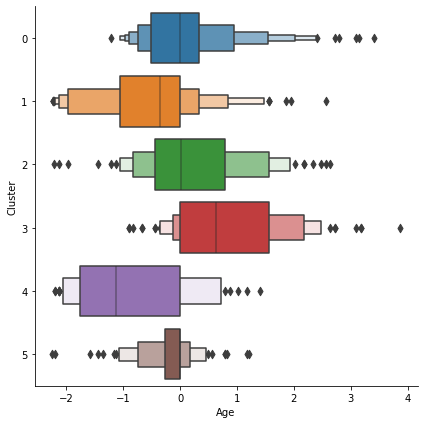

In [ ]:
# Age ile cluster verilerini çizdirdim
sns.catplot(x="Age", y="Cluster", data=X, kind="boxen", height=6);

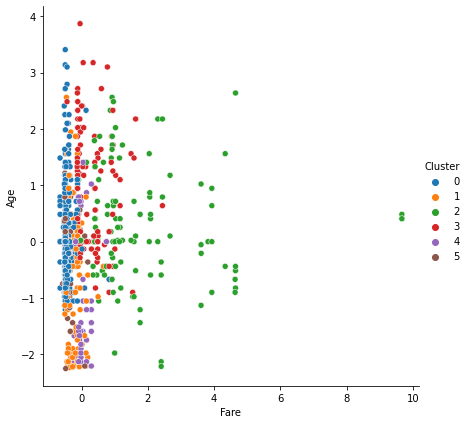

In [ ]:
# Fare ile Age bilgilerini Cluster yardımıyla çizdirdim.
sns.relplot(x="Fare", y="Age", hue="Cluster", data=X, height=6,);

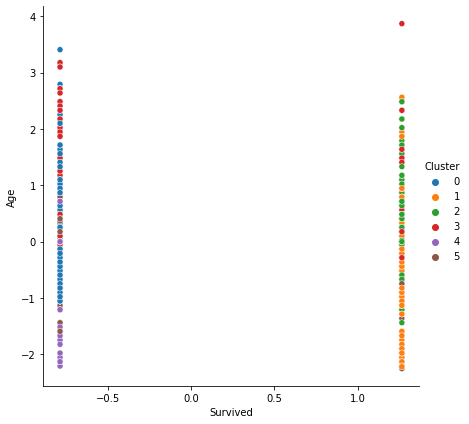

In [ ]:
# Survived ile Age bilgilerini Cluster yardımıyla çizdirdim.
sns.relplot( x="Survived",y="Age", hue="Cluster", data=X, height=6,);

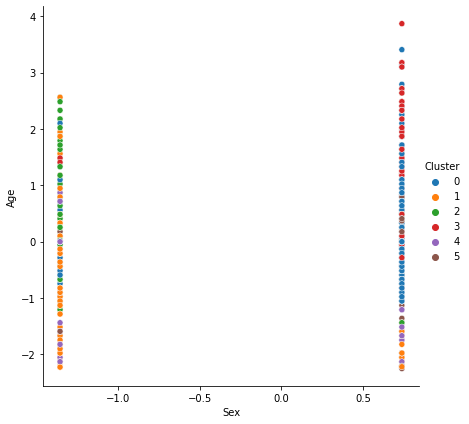

In [ ]:
# Sex ile Age bilgilerini Cluster ile çizdirdim.
sns.relplot(x="Sex", y="Age", hue="Cluster", data=X, height=6,);

In [ ]:
# Aile bilgisini kullanarak kişilerin yalnız olup olmadığını buldum.
df.loc[df['family'] > 0, 'not_alone'] = 0
df.loc[df['family'] == 0, 'not_alone'] = 1
df['not_alone'] =df['not_alone'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,price_per_person,Title,not_alone
0,1,0,3,"braund, mr. owen harris",1,22.0,1,0,A/5 21171,7.2500,0,2,1,3,12,0
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,1,13,0
2,3,1,3,"heikkinen, miss. laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2,0,3,9,1
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",0,35.0,1,0,113803,53.1000,C123,2,1,2,13,0
4,5,0,3,"allen, mr. william henry",1,35.0,0,0,373450,8.0500,0,2,0,3,12,1


Principle component analysis ile daha anlamlı değerler çıkarmaya çalıştım.

In [ ]:
#Soru 15
features = ["Age","Fare", "Sex","Embarked","SibSp","Parch","not_alone" ,"family","Pclass", "price_per_person","Title"]

X = df.copy()
y = X.pop('Survived')
X = X.loc[:, features]

# normalizason
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
from sklearn.decomposition import PCA

# principal components oluşturma
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# dataframe'e çevirme
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.212564,-1.388881,-0.631702,-0.122674,0.469451,-0.408231,-0.782093,-0.602679,0.858316,-0.337098,-7.993646e-16
1,1.087342,3.180819,-0.017017,-1.551345,-0.628721,-0.007081,-1.368575,-0.430391,-0.426448,-0.588457,-6.772616e-16
2,-0.733974,-0.898751,1.692557,0.907060,-0.966718,0.205244,-0.104876,0.546824,0.101913,-0.119019,9.873454e-17
3,0.879278,1.587267,-0.728571,0.432726,-1.216129,-0.521628,-1.513589,-0.603927,-0.049171,0.209530,-7.501131e-16
4,-1.578490,-0.909680,-0.540566,0.204440,0.091535,0.119268,0.187629,0.371433,0.179517,-0.104748,2.688760e-15


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    # kolonlar principal component oldu
    columns=component_names, 
    # Satırlar orijinal değerler oldu
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Age,-0.166882,0.281821,-0.436686,0.013292,-0.361471,0.704271,0.129069,0.120986,0.203314,-0.050629,4.995425e-17
Fare,0.225989,0.452369,-0.016369,0.036419,0.194920,-0.259696,0.074081,0.582032,0.448959,0.302404,2.261648e-17
Sex,-0.219872,-0.101027,-0.417564,-0.028483,0.779609,0.072559,0.285853,-0.222310,0.148485,-0.006528,-6.045521e-17
Embarked,-0.024695,-0.232826,-0.328929,0.860168,-0.149921,-0.237382,-0.060826,0.027545,0.104107,-0.054552,2.440978e-17
SibSp,0.436577,-0.140210,-0.148680,0.043461,0.267659,0.325819,-0.482437,0.186203,-0.213330,0.054000,5.216369e-01
Parch,0.426274,-0.077898,-0.138708,-0.055820,-0.194049,-0.128707,0.740718,-0.021616,-0.200511,-0.030437,3.812938e-01
not_alone,-0.448003,-0.010046,0.140647,0.173214,0.135319,0.108276,0.209057,0.531141,-0.604780,0.166725,-9.807735e-17
family,0.511345,-0.134745,-0.170913,0.001818,0.085992,0.158386,0.040321,0.116465,-0.245976,0.021701,-7.632234e-01
Pclass,-0.064147,-0.539073,0.064157,-0.206226,-0.005863,0.013318,0.055853,0.499444,0.319374,-0.551240,-5.855201e-17
price_per_person,-0.073744,-0.562969,0.009337,-0.125749,-0.160356,0.111005,0.047651,-0.001636,0.236473,0.751996,-3.574882e-17


In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC4     0.158404
PC1     0.156066
PC5     0.129937
PC3     0.129114
PC7     0.107052
PC2     0.100069
PC10    0.085268
PC6     0.083285
PC8     0.063135
PC9     0.042102
PC11    0.035524
Name: MI Scores, dtype: float64

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Grafikler
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # çizim
    fig.set(figwidth=8, dpi=100)
    return axs

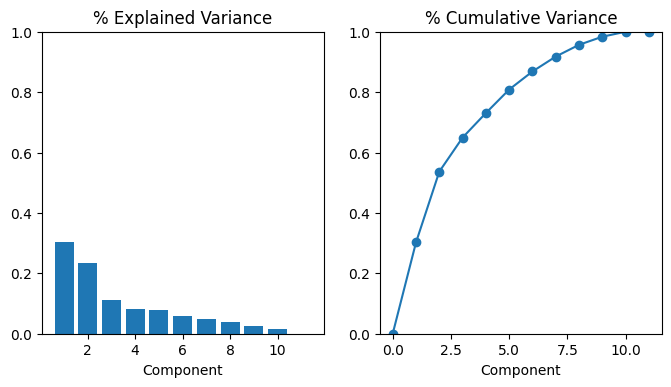

In [ ]:
# Explained ve Cumulative Variance'ları çizdirme
plot_variance(pca);

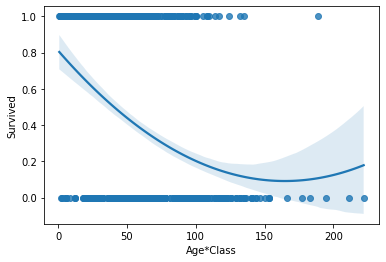

In [ ]:
# Age ile Pclass'ın survived ile ilişkisini çizdirdim.
df['Age*Class']= df['Age']*df['Pclass']
sns.regplot(x="Age*Class", y='Survived', data=df, order=2);

Random Forest ile Naive model oluşturdum.

In [ ]:
#Soru 16
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','price_per_person','Title','not_alone',"Age*Class"]
y = df["Survived"]
X = df[feature]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,price_per_person,Title,not_alone,Age*Class
0,1,0,3,"braund, mr. owen harris",1,22.0,1,0,A/5 21171,7.2500,0,2,1,3,12,0,66.0
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,1,13,0,38.0
2,3,1,3,"heikkinen, miss. laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2,0,3,9,1,78.0
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",0,35.0,1,0,113803,53.1000,C123,2,1,2,13,0,35.0
4,5,0,3,"allen, mr. william henry",1,35.0,0,0,373450,8.0500,0,2,0,3,12,1,105.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# random_state her çalıştığında değerlerin sabit olmasını sağlar
forest_model = RandomForestRegressor(random_state=1)
#  Bu modelde X'e tahminde kullanacağımız sütunları ve y'ye tahmin ettiğimiz sütunu atadım
forest_model.fit(X_train, y_train)
# Tahmin değerlerini bastırdım
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

0.2640095930477096


In [ ]:
from sklearn.metrics import mean_absolute_error
# farklı max_leaf_nodes değerleri seçerek hata değerleri elde ettim ve en iyi çalışan max_leaf_nodes değerini buldum
predicted_match_score = forest_model.predict(X)
mean_absolute_error(y, predicted_match_score)

def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)
for max_leaf_nodes in [5,25,50,100,250]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train,y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0.287574
Max leaf nodes: 25  		 Mean Absolute Error:  0.256856
Max leaf nodes: 50  		 Mean Absolute Error:  0.256868
Max leaf nodes: 100  		 Mean Absolute Error:  0.265565
Max leaf nodes: 250  		 Mean Absolute Error:  0.265443


Permutation importance değerlerini inceledim. Öncesinde kullanabilmek için pip install ile eli5 i güncelledim.

In [ ]:
pip install --upgrade eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 15.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5c4c2725c3cba5e811670c8ebe890152e31614cf565844947d05798690a3e27a
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompat

Permutation importance ile tahminimde en önemli olan veriyi buldum.

In [ ]:
#Soru 17
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# kolonlarımı yolladım
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','price_per_person','Title','not_alone',"Age*Class"]
# hedef verim
y = df["Survived"]
# incelenecek veriler
X = df[feature]

In [ ]:
# Random forest classifier
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

Tahminimde en önemli olan veri, Sex bilgisi çıktı. 

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Permutation importance hesapladım
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
# çıktı aldım
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1112 ± 0.0403,Sex
0.0027 ± 0.0176,family
-0.0036 ± 0.0183,Parch
-0.0045 ± 0.0160,Embarked
-0.0054 ± 0.0067,price_per_person
-0.0108 ± 0.0166,SibSp
-0.0117 ± 0.0185,Pclass
-0.0126 ± 0.0237,Fare
-0.0126 ± 0.0132,not_alone
-0.0161 ± 0.0176,Title


SHAP değerlerini inceledim.

In [ ]:
#Soru 18
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier kullandım
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','price_per_person','Title','not_alone',"Age*Class"]
y = df["Survived"]
X = df[feature]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [ ]:
# Veriden 5. satırı seçtim ve değerleri şekillendirip diziye atadım
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0.84, 0.16]])

In [ ]:
pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.6/569.6 kB 11.6 MB/s eta 0:00:00


In [ ]:
# shap değerlerini inceleyebilmek için indirip import ettim
import shap 

# shap değerlerini hesaplayabilmek için obje oluşturdum
explainer = shap.TreeExplainer(my_model)

# değerleri hesapladım
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
# ekrana çizdirdim
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

Verilerimin hayatta kalma ile olan ilişkisini inceledim.

In [ ]:
#Soru 19
# değerleri integer'a çevirmek için import ettim
from traitlets.traitlets import Integer
# mutual_info_regression'da kullanacağım X ve y değerlerini atadım
X = df.copy()
y = X.pop("Survived")

# kategorik verilere etiket atadım
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# ayrık değerlerimin dtype'ını integer yaptım
discrete_features = X.dtypes == Integer

Bu işlemi yapacak fonksiyonu yazdım ve değer olarak verilerimi, hedef değişkeni ve ayrık değerleri yolladım.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# Yeni verilerimiz de dahil olmak üzere, verilerin hayatta kalma ile ilişkisini hesaplayan fonksiyon
def make_mi_scores(X, y, discrete_features):
  # ilişki bilgisini hesapla
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
# verilerimi yolladım ve ilişkilerini hesaplattım
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores 

Title               0.167753
Fare                0.145571
Sex                 0.123216
Ticket              0.086853
Age*Class           0.077758
Parch               0.060734
price_per_person    0.055071
Cabin               0.053609
Pclass              0.045279
Embarked            0.033308
Age                 0.029691
family              0.029569
SibSp               0.026747
Name                0.017263
PassengerId         0.014117
not_alone           0.000000
Name: MI Scores, dtype: float64

Bu ilişkileri grafik olarak ekrana bastırdım. En çok Sex ve Title ile Survived arasında ilişki buldum. Sonrasında en yakın Fare ve Ticket diye ilerliyor. Sonra daha da azalıyor. Yukarıda sayısal olarak aşağıda da grafik olarak çıktılar var.

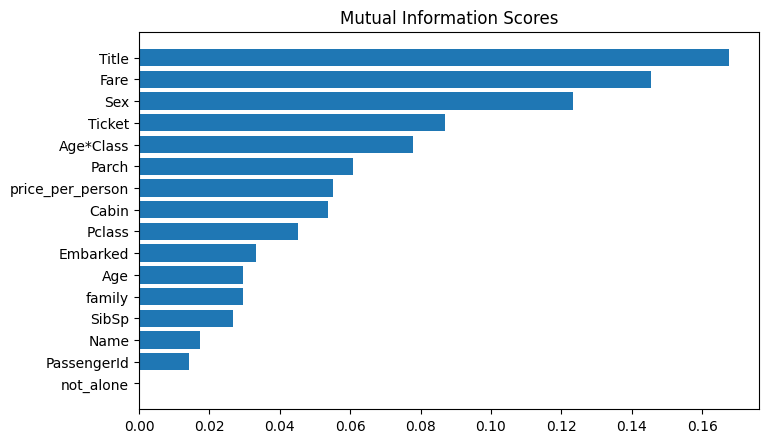

In [ ]:
# Ekrana grafik bastırma fonksiyonu
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Data Leakage ile ilgili yorumlarım:

In [ ]:
  #Soru 20
  print("Data leakage gerçekleşmesi muhtemel bir durum, yani evet  bu endişeyi taşıyorum. \nSebebine baktığımda, öncelikle Train-Test Contamination durumunu yaşayabileceğimi düşünüyorum. Çünkü bu durum; training data ile validation data arasında ufak bir dikkatsizlik sonucu oluşabilir. Bu sebeple herhangi bir hata yapmış olabilir miyim diye düşünüyorum.")
  print("İki ana Data leakage türü bulunuyor: Target Leakage ve Train-Test Contamination.")
  print("Target Leakage: Predictor'ların, prediction zamanı müsait olmayacak data'yı dahil etmesi ile oluşur.")
  print("Örneğin, bir hastalık karşısında antibiyotik alan kişiler ile hastalığa yakalanma oranları hakkında bir tahmin algoritması kuracağımızı düşünelim. Model, antibiyotik almayan kişilerin hasta olmadığını düşünecektir ve  buna göre bir sonuç çıkaracaktır. Fakat gerçek hayatta, hasta olan insanlar antibiyotik almalarına rağmen ileride tekrar hastalığa yakalandığında antibiyotik alma değeri sıfırlanmış olmalı. Bu tarz durumlar target leakage'a örnek olabilir.")
  print("Train-Test Contamination: Training Data ile Validation Data'yı ayırırken dikkatsiz olursak oluşabilecek bir durumdur. Validation Data, ön işlemeyi etkiliyorsa, bu işlem bazı yöntemlerle kesilebilir. Bu durumda Train-Test Contamination oluşabilir.")
  print("Örneğin, train_test_split() işlevini çağırmadan önce ön işlemeyi çalıştırırsak, modelimiz iyi doğrulama puanları alarak bize büyük bir güven verebilir, ancak karar vermek için onu dağıttığımızda düşük performans gösterebilir.")
  print("Ne de olsa, validation veya test verilerinden gelen verileri tahminlerinizi nasıl yaptığımıza dahil ettik, böylece yeni verilere genelleme yapamasa bile bu belirli veriler üzerinde iyi sonuç verebilir. Daha detaylı incelediğimizde bu sorun daha da riskli hale gelir.")

Data leakage gerçekleşmesi muhtemel bir durum, yani evet  bu endişeyi taşıyorum. 
Sebebine baktığımda, öncelikle Train-Test Contamination durumunu yaşayabileceğimi düşünüyorum. Çünkü bu durum; training data ile validation data arasında ufak bir dikkatsizlik sonucu oluşabilir. Bu sebeple herhangi bir hata yapmış olabilir miyim diye düşünüyorum.
İki ana Data leakage türü bulunuyor: Target Leakage ve Train-Test Contamination.
Target Leakage: Predictor'ların, prediction zamanı müsait olmayacak data'yı dahil etmesi ile oluşur.
Örneğin, bir hastalık karşısında antibiyotik alan kişiler ile hastalığa yakalanma oranları hakkında bir tahmin algoritması kuracağımızı düşünelim. Model, antibiyotik almayan kişilerin hasta olmadığını düşünecektir ve  buna göre bir sonuç çıkaracaktır. Fakat gerçek hayatta, hasta olan insanlar antibiyotik almalarına rağmen ileride tekrar hastalığa yakalandığında antibiyotik alma değeri sıfırlanmış olmalı. Bu tarz durumlar target leakage'a örnek olabilir.
Train-Test Con

Pipeline'lar oluşturdum:

In [ ]:
#Soru 21
import pandas as pd
from sklearn.model_selection import train_test_split

# Hedef ile tahminleri ayırdım
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','price_per_person','Title','not_alone',"Age*Class"]
y = df["Survived"]
X = df[feature]

# training ve validation değerlerini ayırdım
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Diğerlerine göre daha az farklı değer bulunan kategorik değişkenleri ayırdım
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# nümerik kolonları ayırdım
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# sadece seçili kolonları al
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,price_per_person,Title,not_alone,Age*Class
140,3,0,29.699118,0,2,15.2458,0,2,3,13,0,89.097353
439,2,1,31.000000,0,0,10.5000,2,0,3,12,1,62.000000
817,2,1,31.000000,1,1,37.0042,0,2,3,12,0,62.000000
378,3,1,20.000000,0,0,4.0125,0,0,3,12,1,60.000000
491,3,1,21.000000,0,0,7.2500,2,0,3,12,1,63.000000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# nümerik veriler için önişleme
numerical_transformer = SimpleImputer(strategy='constant')

# kategorik veriler için önişleme
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Sayısal ve kategorik veriler için paket ön işleme
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Bir pipeline'da paket ön işleme ve modelleme kodu
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Eğitim verilerinin ön işlenmesi, fit model 
my_pipeline.fit(X_train, y_train)

# Doğrulama verilerinin ön işlenmesi, tahminlerin alınması
preds = my_pipeline.predict(X_valid)

# Modelin değerlendirilmesi, hata oranı
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.22956700346336398


In [ ]:
from sklearn.model_selection import cross_val_score

# Sklearn negatif MAE hesapladığı için -1 ile çarptım 
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.27598665 0.23313596 0.20996974 0.24720698 0.22575165]


Decision Tree modeli ile, pipeline üzerinden cross validation:

In [ ]:
#Soru 22
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Hedef ve tahminler
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','price_per_person','Title','not_alone',"Age*Class"]
y = df["Survived"]
X = df[feature] 

In [ ]:
# Pipeline
my_pipeline1 = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', DecisionTreeRegressor(random_state=0))
                             ])

In [ ]:
from sklearn.model_selection import cross_val_score

# sklearn negatif hesapladığı için -1 ile çarptım
# cross validation
scores = -1 * cross_val_score(my_pipeline1, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("MAE  scores min:\n", scores.min())
print("MAE scores argmin:\n", scores.argmin())

MAE scores:
 [0.25574178 0.2380618  0.2184992  0.26095506 0.23829588]
MAE  scores min:
 0.21849919743178167
MAE scores argmin:
 2


In [ ]:
#  Ortalama Mae değeri bütün denemeler içinde
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
0.24231074136180536


Random Forest modeli ile, pipeline üzerinden cross validation:

In [ ]:
#Soru 23
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Hedef ve tahminler
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','price_per_person','Title','not_alone',"Age*Class"]
y = df["Survived"]
X = df[feature]

In [ ]:
# pipeline ve önişleme
# SimpleImputer ve Random Forest Regressor kullandım
my_pipeline2 = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [ ]:
from sklearn.model_selection import cross_val_score

# sklearn negatif hesapladığı için -1 ile çarptım
# cross validation işlemi
scores = -1 * cross_val_score(my_pipeline2, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("MAE  scores min:\n", scores.min())
print("MAE scores argmin:\n", scores.argmin())

MAE scores:
 [0.27358041 0.23170716 0.20942142 0.24741317 0.2242713 ]
MAE  scores min:
 0.20942141722197904
MAE scores argmin:
 2


In [ ]:
# Ortalama değer
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
0.23727868986306308


Xgboost modeli ile, pipeline üzerinden cross validation:

In [ ]:
#Soru 24
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Hedef ve tahminler
feature= ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','price_per_person','Title','not_alone',"Age*Class"]
y = df["Survived"]
X = df[feature]

In [ ]:
# Pipeline ve önişleme
xg_reg = XGBRegressor(objective ='reg:squarederror', n_estimators=100,learning_rate=0.05, n_jobs=4)
my_pipeline3 = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model',xg_reg )
                             ])

In [ ]:
from sklearn.model_selection import cross_val_score

# sklearn -1 ile çarptım negatif değeri düzeltmek için
# cross validation
scores = -1 * cross_val_score(my_pipeline3, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("MAE  scores min:\n", scores.min())
print("MAE scores argmin:\n", scores.argmin())

MAE scores:
 [0.28218968 0.26404647 0.26239811 0.28097246 0.22756392]
MAE  scores min:
 0.2275639223248771
MAE scores argmin:
 4


In [ ]:
# Ortalama değer
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
0.2634341294312685


Her bir model için en iyi modellerim:

In [ ]:
#Soru 25
# Yukarıdan edindiğim bilgilere göre her bir model için en iyi modellerim: 
print("Decision Tree modeli için en iyi modelim Decision_tree_model_2")
print("Random Forest modeli için en iyi modelim Random_forest_model_2")
print("XGBoost modeli için en iyi modelim XGBoost_model_4")


Decision Tree modeli için en iyi modelim Decision_tree_model_2
Random Forest modeli için en iyi modelim Random_forest_model_2
XGBoost modeli için en iyi modelim XGBoost_model_4


En iyi modelim:

In [ ]:
#Soru 26
print("25. sorudaki her modelden en iyi olduğunu seçtiğim modellere baktım. ")
print("Bu modeller arasında 0.20942141722197904 MAE  scores min değeri ile Random_forest_model_2 en iyi model oldu. Hata oranı en düşük ve en başarılı modelim budur. ")


25. sorudaki her modelden en iyi olduğunu seçtiğim modellere baktım. 
Bu modeller arasında 0.20942141722197904 MAE  scores min değeri ile Random_forest_model_2 en iyi model oldu. Hata oranı en düşük ve en başarılı modelim budur. 
